# Figure 4

## a

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from flyvision.analysis.clustering import check_markers
from flyvision.utils.activity_utils import CellTypeArray
from flyvision.plots import plt_utils 
from flyvision.plots import plots
from flyvision.datasets import MovingEdge
from flyvision.analysis.moving_bar_responses import MovingEdgeResponseView
from flyvision.utils.groundtruth_utils import tuning_curves

from flyvision import EnsembleView

In [15]:
ensemble = EnsembleView("flow/9998", checkpoint="best",
        validation_subdir="validation",
        loss_file_name="EPE")

Loading ensemble:   0%|          | 0/50 [00:00<?, ?it/s]

[2024-09-10 16:00:40] Failed to load results/flow/9998/040: network
[2024-09-10 16:00:42] Loaded 49 networks.


In [12]:
ensemble.model_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [3]:
responses = ensemble.stored_responses(subdir="movingedge_responses")

In [4]:
dataset = MovingEdge(
            intensities=[0, 1],
            speeds=[2.4, 4.8, 9.7, 13, 19, 25],
        offsets=(-10, 11),
        dt=1 / 200,
            height=80,
            post_pad_mode="continue",
            device="cuda",
            t_pre=1.0,
            t_post=1.0,)

In [5]:
responses_cta = CellTypeArray(
    responses,
    connectome=ensemble[0].connectome,
)

In [55]:
response_view = MovingEdgeResponseView(
    arg_df=dataset.arg_df,
    responses=responses_cta,
    config=dataset.config,
    stim_sample_dim=1,
    temporal_dim=2,
)

In [44]:
norm = ensemble.responses_norm("naturalistic_stimuli_responses")

In [59]:
1.5 * 5.8

8.7

In [60]:
masks = response_view.get_time_masks(
    *np.array(
        [
            dataset.offsets[0],
            dataset.offsets[1] - 1,
        ]
    )
    * 2.25
    / 5.8,
)

response_view = response_view.reshape_stim_sample_dim(
    "angle", "width", "intensity", "speed"
).masked(
    masks, mask_dims=(4, 5)
)

In [54]:
response_view

In [ ]:
fig, axes, _ = plots.plt_utils.get_axis_grid(
    range(4),
    projection="polar",
    aspect_ratio=4,
    figsize=[2.95, 0.83],
    wspace=0.25,
)
for i, cell_type in enumerate(["T4a", "T4b", "T4c", "T4d"]):
    peak.plot_angular_tuning(
        cell_type,
        intensity=1,
        fig=fig,
        ax=axes[i],
        groundtruth=True,
        linewidth=1.0,
        tuning=peak[:, relevant_clusters[cell_type][0]],
    )
    axes[i].set_xlabel(cell_type)

for ax in axes:
    ax.xaxis.label.set_fontsize(8)
    [i.set_linewidth(0.5) for i in ax.spines.values()]
    ax.grid(True, linewidth=0.5)

# fig.savefig(
#     directory / "T4_tuning_on_w_groundtruth_mean.pdf",
#     bbox_inches="tight",
#     transparent=True,
# )

In [34]:
response_view = response_view.divide_by_given_array(norm, dims=(0, -1))

In [35]:
peak = response_view.transpose(1, 0, 2, 3, 4, 5, 6).peak()

MovingEdgeResponseView(     angle  width  intensity    t_stim  speed
0        0     80          0  3.394397    2.4
1        0     80          0  1.697198    4.8
2        0     80          0  0.839851    9.7
3        0     80          0  0.626658   13.0
4        0     80          0  0.428766   19.0
..     ...    ...        ...       ...    ...
139    330     80          1  1.697198    4.8
140    330     80          1  0.839851    9.7
141    330     80          1  0.626658   13.0
142    330     80          1  0.428766   19.0
143    330     80          1  0.325862   25.0

[144 rows x 5 columns], {'R1': 'Array((12, 3, 1, 2, 6, 1))', 'R2': 'Array((12, 3, 1, 2, 6, 1))', 'R3': 'Array((12, 3, 1, 2, 6, 1))', 'R4': 'Array((12, 3, 1, 2, 6, 1))', 'R5': 'Array((12, 3, 1, 2, 6, 1))', 'R6': 'Array((12, 3, 1, 2, 6, 1))', 'R7': 'Array((12, 3, 1, 2, 6, 1))', 'R8': 'Array((12, 3, 1, 2, 6, 1))', 'L1': 'Array((12, 3, 1, 2, 6, 1))', 'L2': 'Array((12, 3, 1, 2, 6, 1))', 'L3': 'Array((12, 3, 1, 2, 6, 1))', 'L4

In [41]:
response_view.plot_angular_tuning("T4c", intensity=1, tuning=peak[:, [0, 1, 2]])

TypeError: unhashable type: 'numpy.ndarray'

## b

## d

## e

## f

In [45]:
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as nnf

import pandas as pd
import numpy as np
import dvs
from dvs import plots
%load_ext autoreload
%autoreload 2
mpl.rcParams['figure.dpi'] = 300
assert mpl.rcParams['font.family'][0] == 'sans-serif' and mpl.rcParams['font.sans-serif'][0] == 'Arial'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
validation_subwrap = "original_validation_v2"
validation_loss_fn = "epe"

movingedge_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/moving_edges"
flash_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/flashes"
# impulse_responses_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/impulse_responses"
# impulse_responses_subwrap = "impulse_timp50"
# impulse_responses_subwrap = "impulse_timp40ms"
# impulse_responses_subwrap = "impulse_timp40ms_dt100"
# impulse_responses_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/impulse_v2_two_columns"
impulse_responses_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/impulse_responses" 
impulse_responses_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/long_impulse_responses" 

naturalistic_responses_wrap = "naturalistic_responses_v4"
naturalistic_responses_wrap = (
    f"{validation_subwrap}/{validation_loss_fn}_based/{naturalistic_responses_wrap}"
)
nmeis_subwrap = f"{naturalistic_responses_wrap}/nmeis"
rnmeis_subwrap = f"{naturalistic_responses_wrap}/rnmeis"


In [47]:
ensemble_name = "flow/0092" # type: str

# umap parameters
min_dist = 0.12
spread = 9
n_neighbors = 5
n_epochs = 1500
random_state = 42
naturalistic_responses_version = "v4"

# gaussian mixture
init_params="kmeans"
n_init = 1
max_iter= 1000
gm_random_state = 0
tol = 1e-3
max_components = 5

delete_if_exists = True
use_stored_embeddings=False

figure_version = 0

In [48]:
# Parameters
ensemble_name = "flow/0092"
model_id = "0002"
min_dist = 0.105
spread = 9.0
n_neighbors = 5
naturalistic_responses_version = "v4"
random_state = 42
init_params = "kmeans"
n_init = 100
max_iter = 1000
gm_random_state = 0
tol = 0.001
max_components = 5
figure_version = 2
use_stored_embeddings = True
delete_if_exists = False


In [49]:
embedding_kwargs=dict(
            min_dist=min_dist,
            spread=spread,
            n_neighbors=n_neighbors,
            random_state=random_state,
            n_epochs=n_epochs,
        )
gm_kwargs = dict(range_n_clusters=list(range(1, max_components + 1)),
                n_init=n_init,
                max_iter=max_iter,
                random_state=random_state,
                tol=tol)

In [50]:
embedding_kwargs=dict(
            min_dist=min_dist,
            spread=spread,
            n_neighbors=n_neighbors,
            random_state=random_state,
            n_epochs=n_epochs,
        )
gm_kwargs = dict(range_n_clusters=list(range(1, max_components + 1)),
                n_init=n_init,
                max_iter=max_iter,
                random_state=random_state,
                tol=tol)

In [51]:
embedding_kwargs

{'min_dist': 0.105,
 'spread': 9.0,
 'n_neighbors': 5,
 'random_state': 42,
 'n_epochs': 1500}

In [52]:
gm_kwargs

{'range_n_clusters': [1, 2, 3, 4, 5],
 'n_init': 100,
 'max_iter': 1000,
 'random_state': 42,
 'tol': 0.001}

In [9]:
def copydir():
    import shutil

    orig_directory = dvs.figure_03_best_model_ensemble
    template_directory = (
        orig_directory.parent.parent.parent.parent
        / "other"
        / "figure_03_best_model_ensemble"
        / "template"
    )
    directory = (
        template_directory.parent / f"{figure_version:03}"
    )
    directory.mkdir(exist_ok=True, parents=True)
    shutil.copytree(template_directory, directory, dirs_exist_ok=True)
    return directory / "assets/links"

In [10]:
directory = copydir()

In [11]:
directory = dvs.figure_03_best_model_ensemble.parent.parent / "002/assets/links"

# load clustering

In [12]:
ensemble = dvs.analysis.EnsembleViews("flow/0092")

  0%|          | 0/50 [00:00<?, ?it/s]

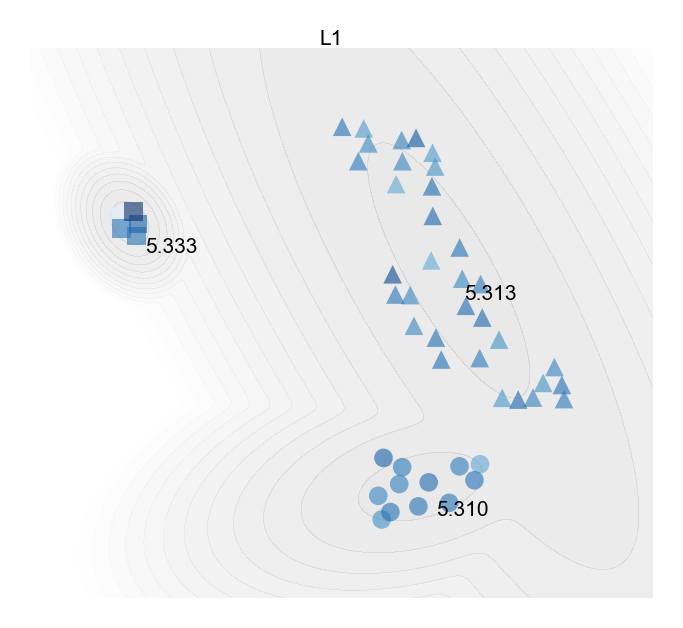

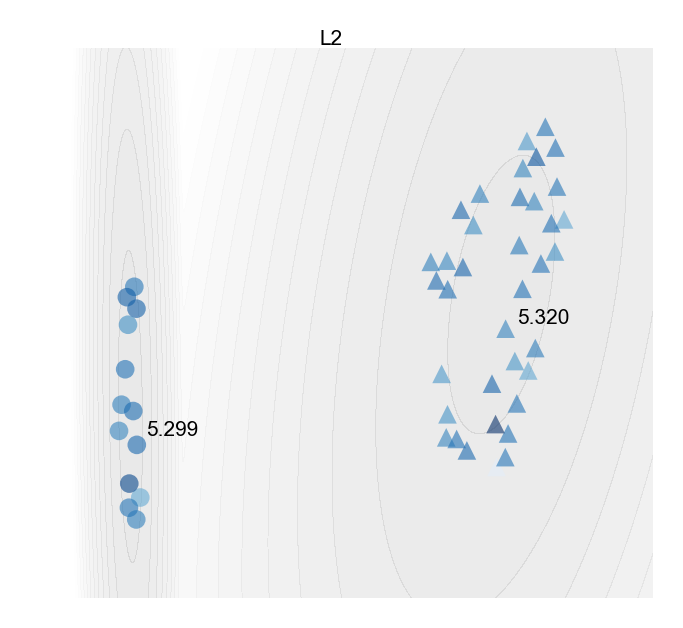

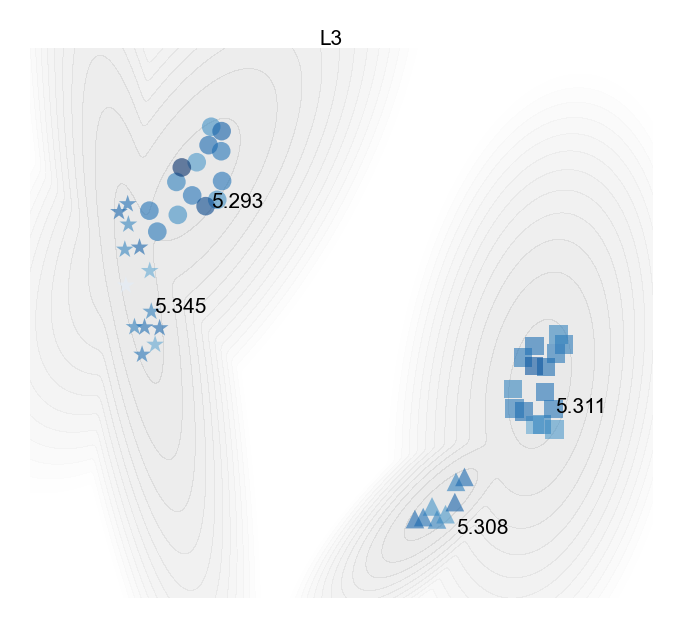

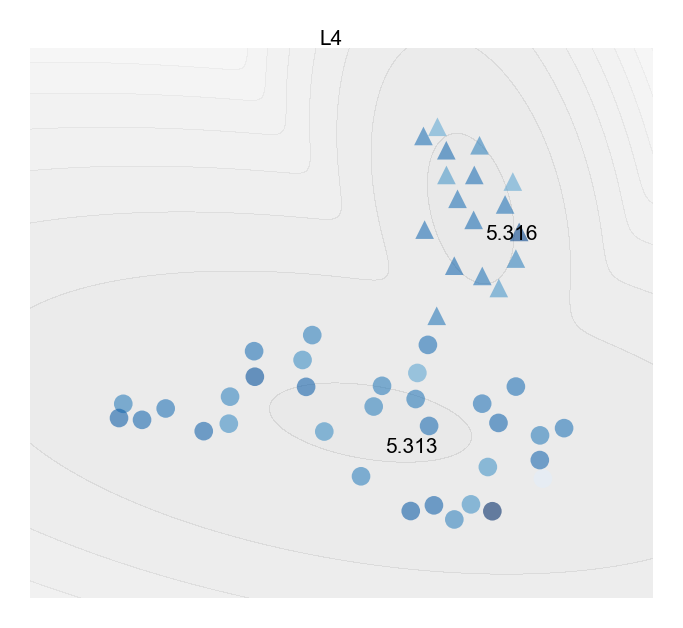

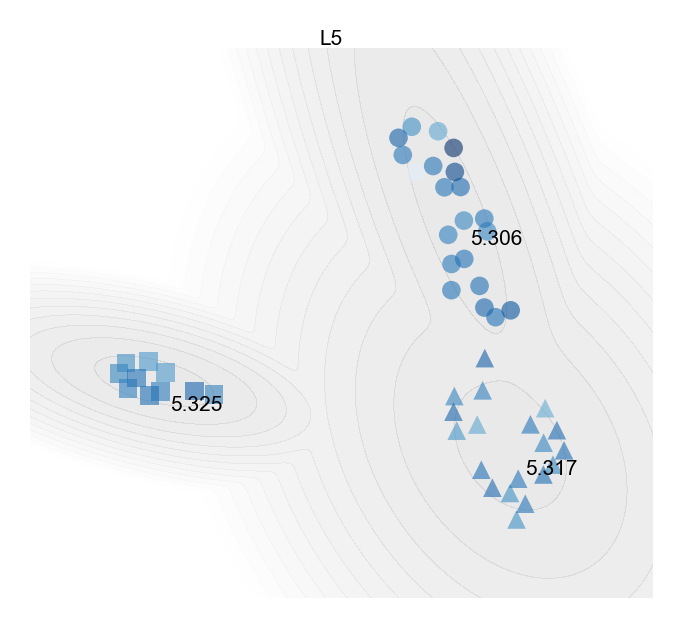

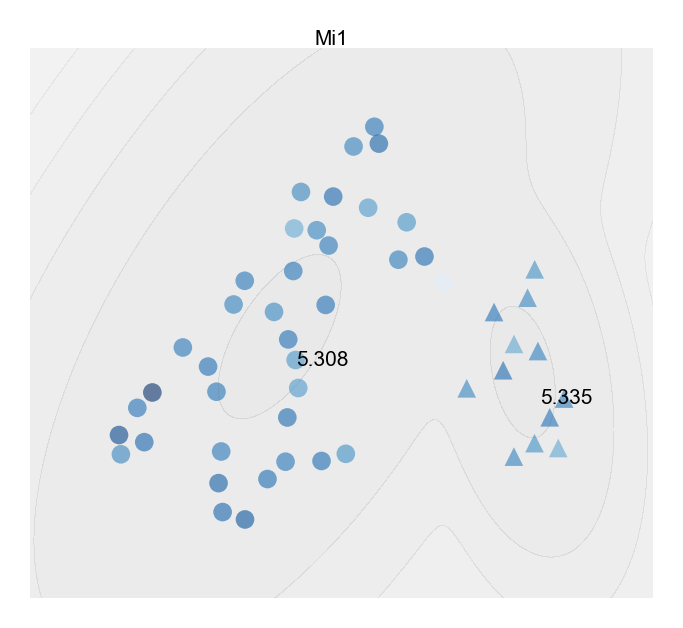

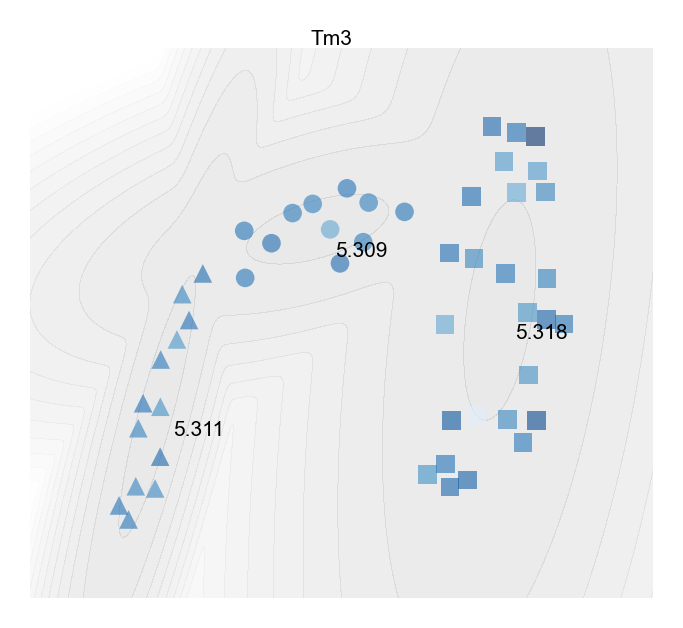

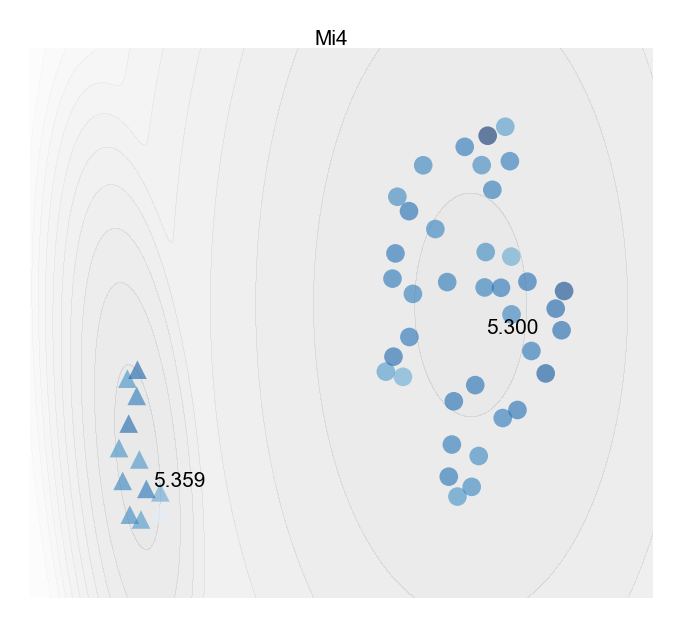

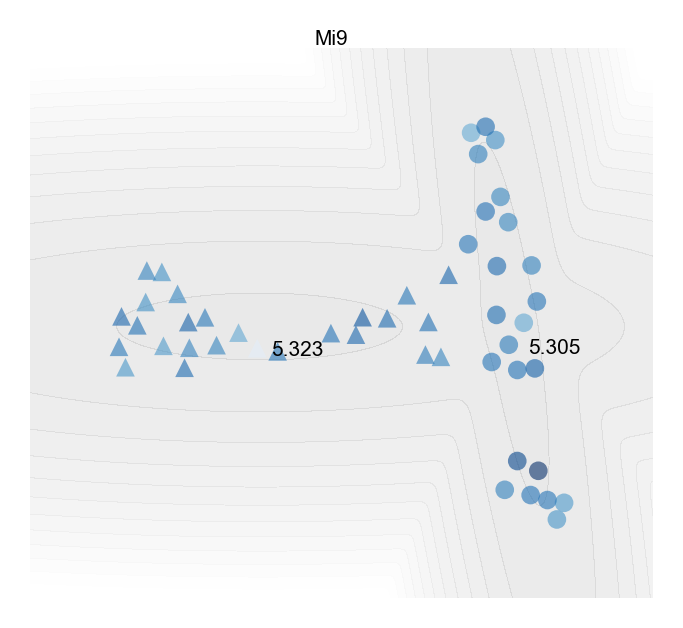

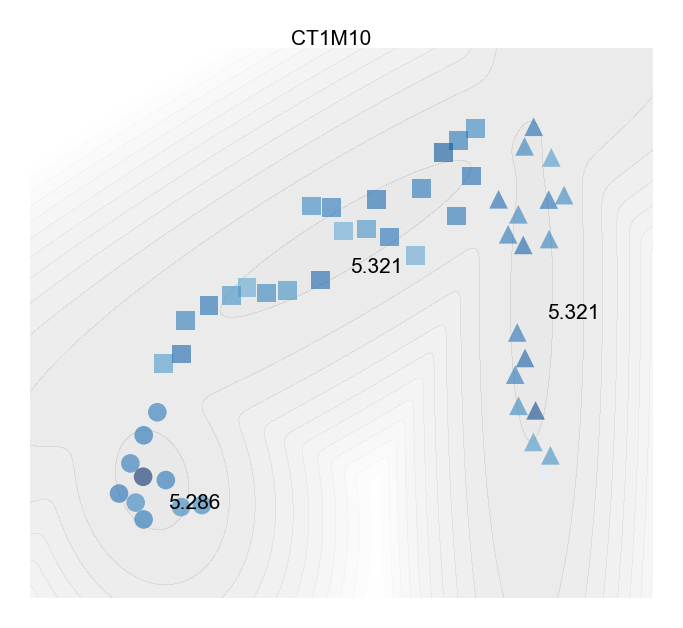

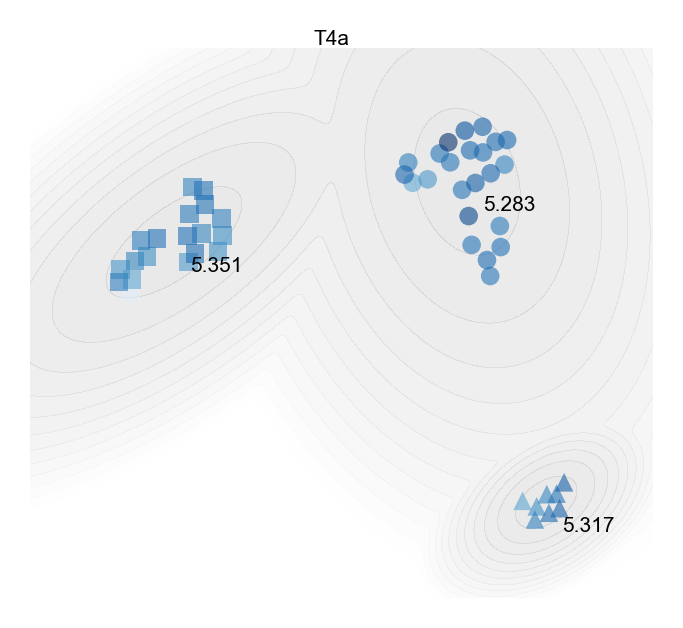

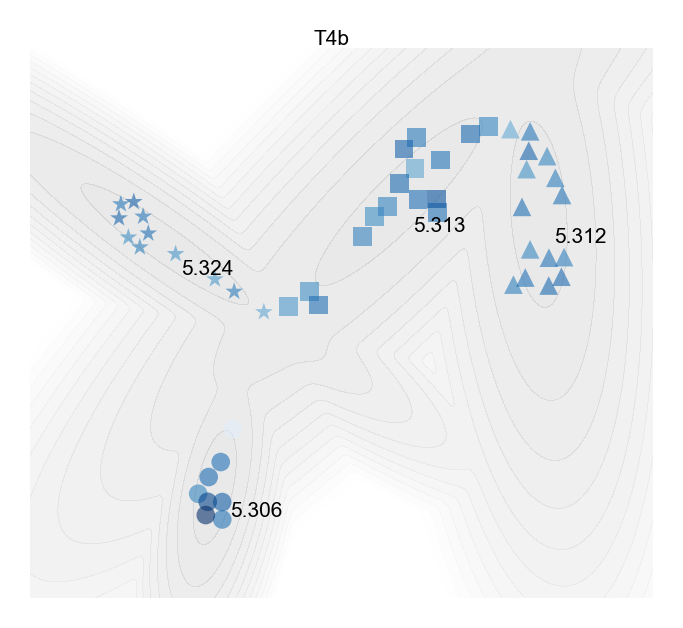

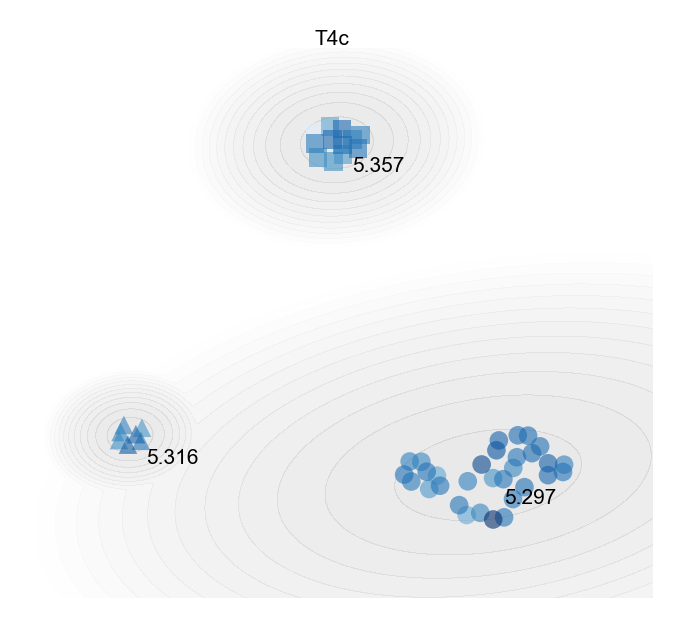

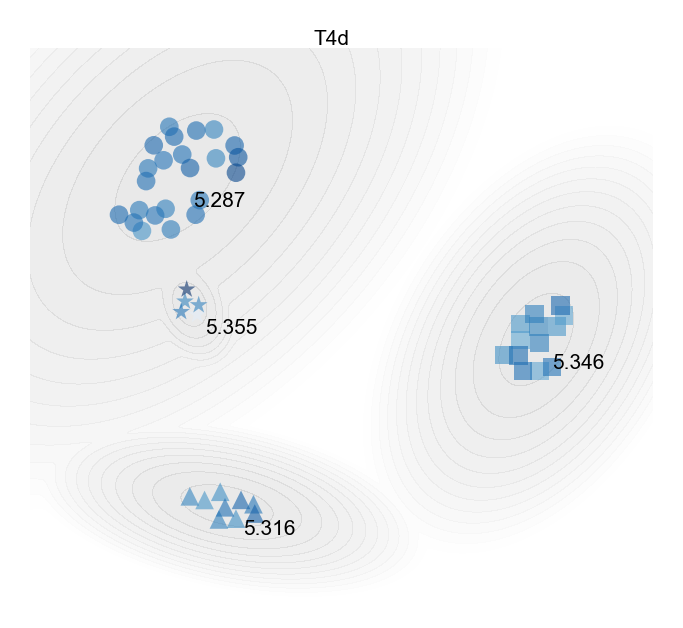

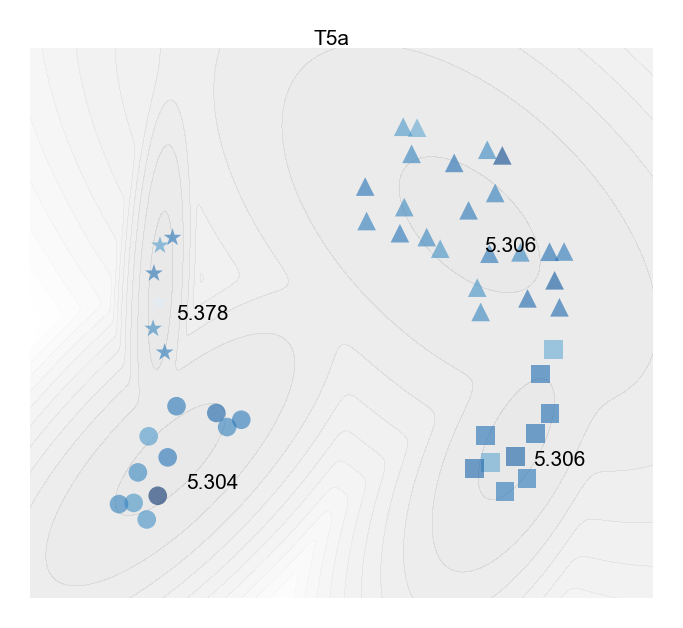

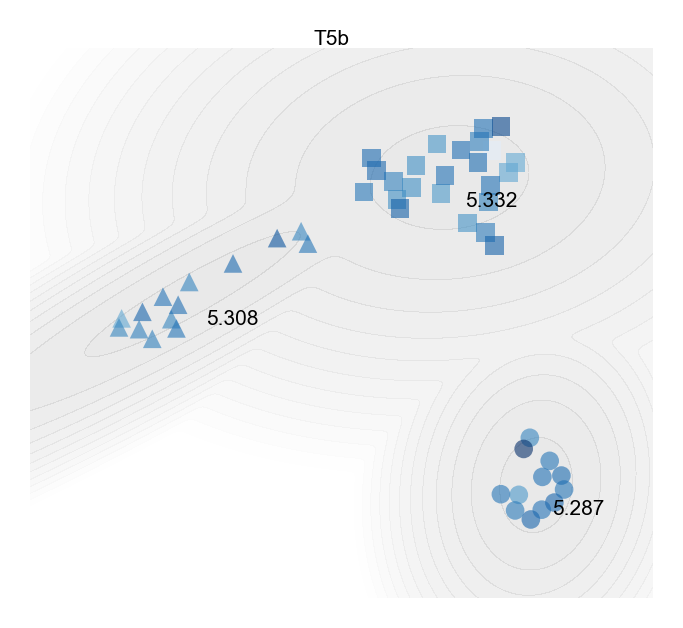

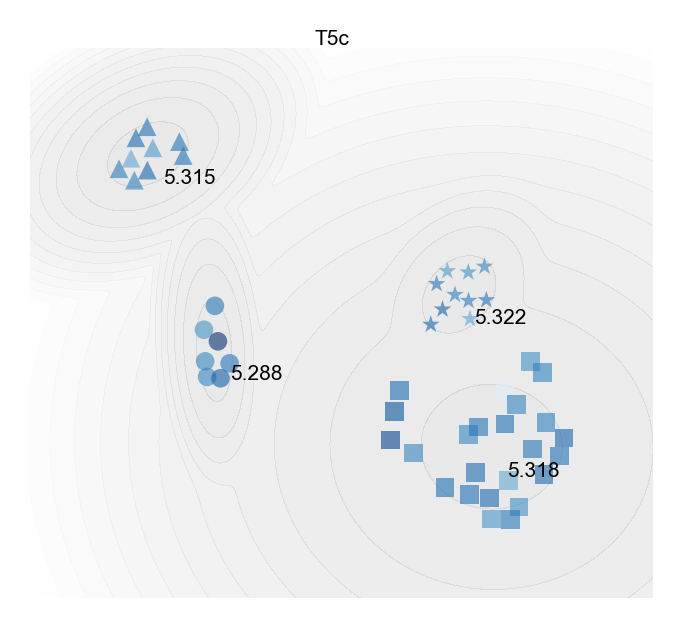

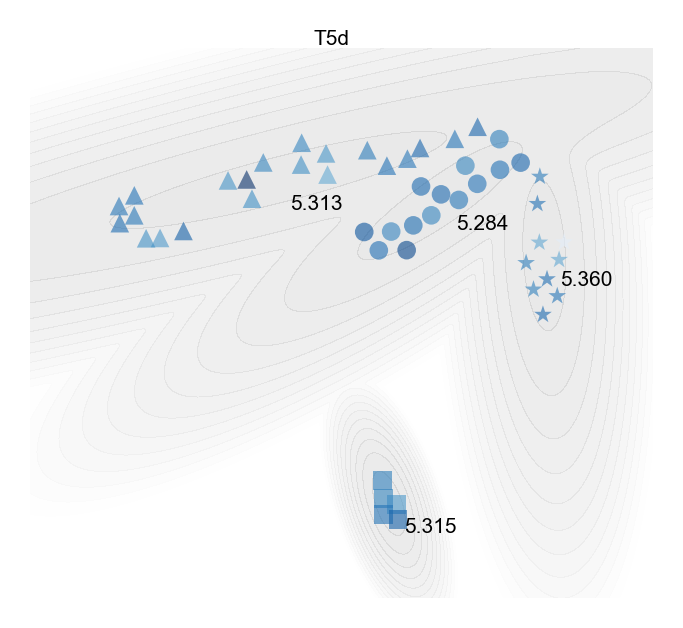

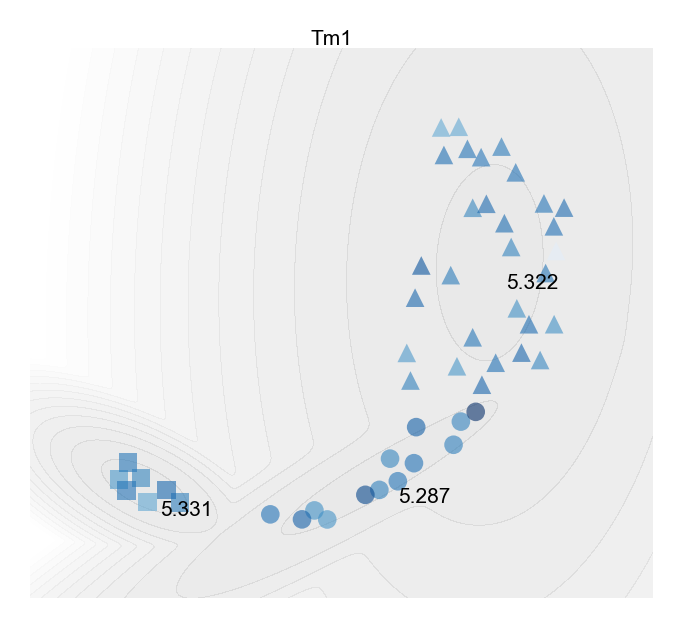

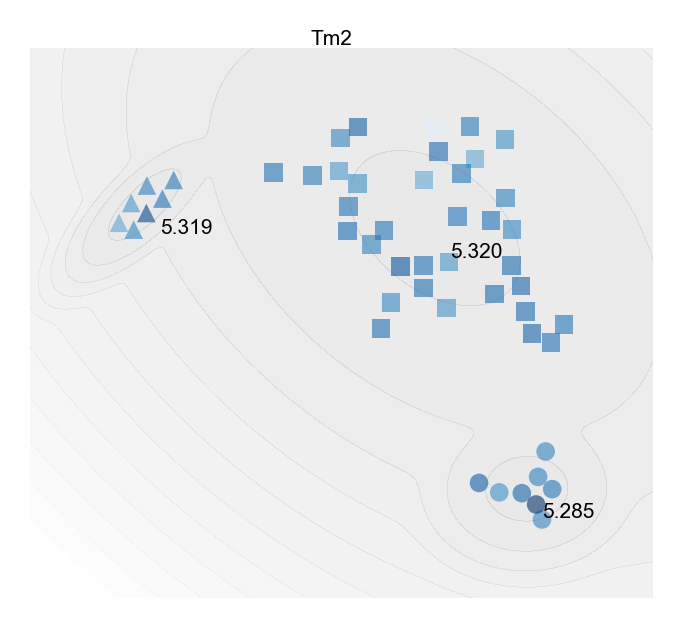

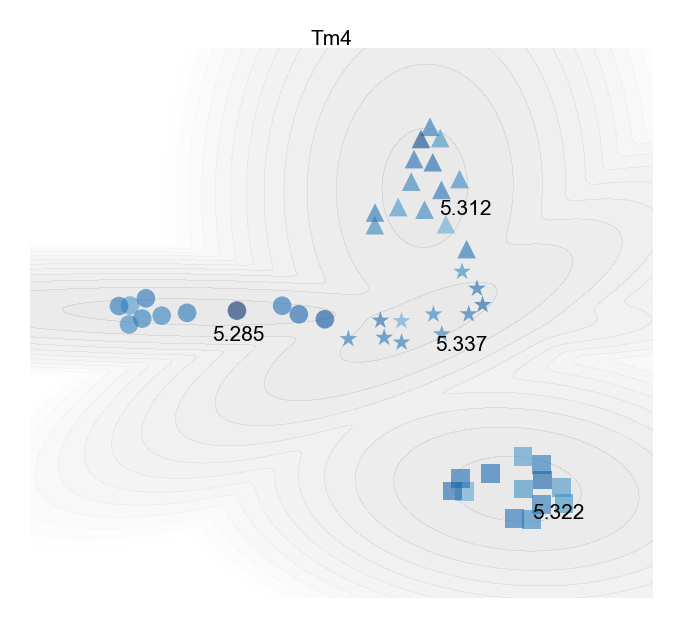

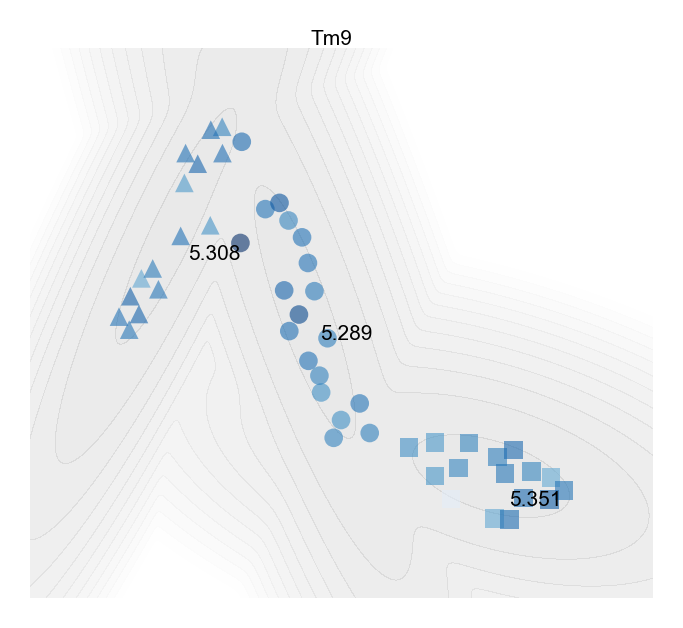

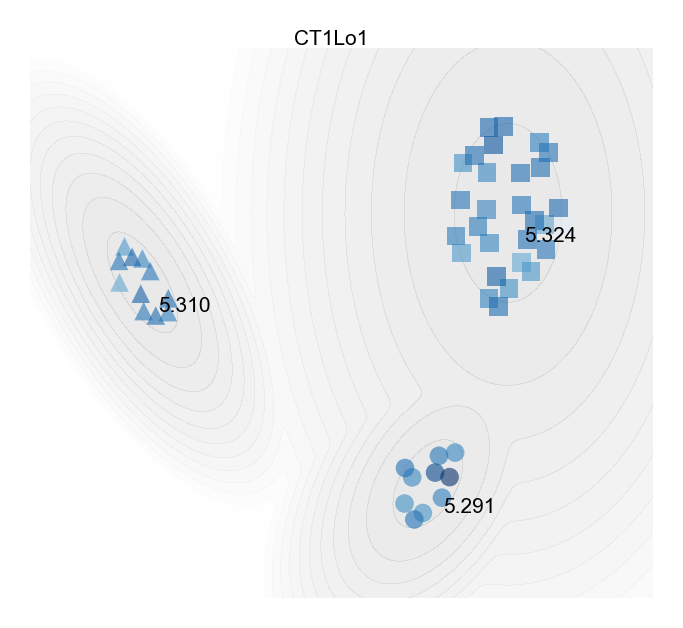

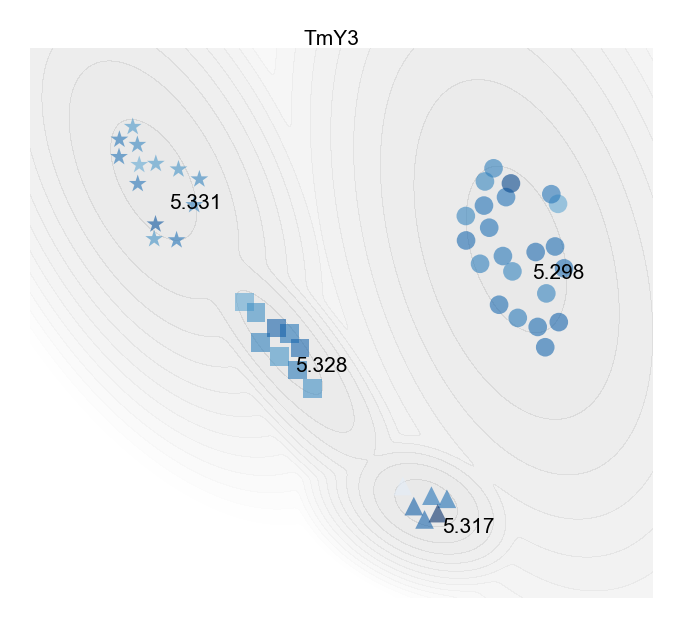

In [42]:
relevant_cell_types = [
    "L1", "L2", "L3", "L4", "L5",
    "Mi1", "Tm3", "Mi4", "Mi9", "CT1M10",
    "T4a", "T4b", "T4c", "T4d",        
    "T5a", "T5b", "T5c", "T5d", 
    "Tm1", "Tm2", "Tm4", "Tm9", "CT1Lo1",
    "TmY3"
             ]
relevant_clusters = {}
for cell_type in relevant_cell_types:
    if cell_type not in relevant_clusters:
        relevant_clusters[cell_type] = ensemble.cluster_indices(
            cell_type,
            naturalistic_responses_wrap=naturalistic_responses_wrap,
            embedding_kwargs=embedding_kwargs,
            gm_kwargs=gm_kwargs,
            validation_subwrap=validation_subwrap,
            validation_loss_fn=validation_loss_fn,
            task_error_sort_mode="mean",
            use_stored_embedding=True,
            store_new_embedding=False,
            delete_if_exists=False,
        )

# a - average T4 and T5 motion tuning

In [14]:
from dvs.utils.activity_utils import StimulusResponseIndexer, CellTypeArray

In [15]:
ensemble.init_movingbar(subwrap=movingedge_subwrap)

In [16]:
ensemble.init_response_view(movingedge_subwrap)

In [18]:
rectified_norm = ensemble.responses_to_naturalistic_stimulus_norm(
    naturalistic_responses_wrap, use_stored=True, rectified=True
)

In [19]:
view = (
    ensemble.moving_edge_response_view
    .rectify()
)

view = view.divide_by_given_array(rectified_norm, dims=(0, -1))
peak = view.transpose(1, 0, 2, 3, 4, 5, 6).peak()

##### load responses to moving edges

##### visualize

##### T4 mean alone

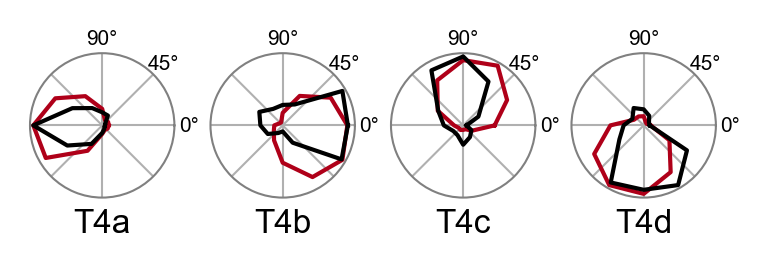

In [22]:
fig, axes, _ = plots.plt_utils.get_axis_grid(
    range(4),
    projection="polar",
    aspect_ratio=4,
    figsize=[2.95, 0.83],
    wspace=0.25,
)
for i, cell_type in enumerate(["T4a", "T4b", "T4c", "T4d"]):
    peak.plot_angular_tuning(
        cell_type,
        intensity=1,
        fig=fig,
        ax=axes[i],
        groundtruth=True,
        linewidth=1.0,
        tuning=peak[:, relevant_clusters[cell_type][0]],
    )
    axes[i].set_xlabel(cell_type)

for ax in axes:
    ax.xaxis.label.set_fontsize(8)
    [i.set_linewidth(0.5) for i in ax.spines.values()]
    ax.grid(True, linewidth=0.5)

# fig.savefig(
#     directory / "T4_tuning_on_w_groundtruth_mean.pdf",
#     bbox_inches="tight",
#     transparent=True,
# )

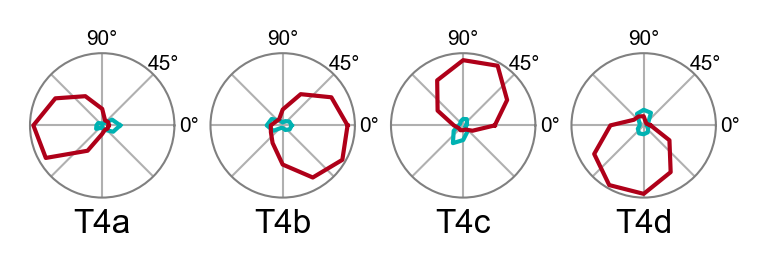

In [28]:
fig, axes, _ = plots.plt_utils.get_axis_grid(
    range(4),
    projection="polar",
    aspect_ratio=4,
    figsize=[2.95, 0.83],
    wspace=0.25,
)
for i, cell_type in enumerate(["T4a", "T4b", "T4c", "T4d"]):
    peak.plot_angular_tuning(
        cell_type,
        intensity=0,
        fig=fig,
        ax=axes[i],
        groundtruth=False,
        linewidth=1.0,
        tuning=peak[:, relevant_clusters[cell_type][0]],
        compare_across_contrasts=True,
    )
    peak.plot_angular_tuning(
        cell_type,
        intensity=1,
        fig=fig,
        ax=axes[i],
        groundtruth=False,
        linewidth=1.0,
        tuning=peak[:, relevant_clusters[cell_type][0]],
        compare_across_contrasts=True,
    )
    axes[i].set_xlabel(cell_type)

for ax in axes:
    ax.xaxis.label.set_fontsize(8)
    [i.set_linewidth(0.5) for i in ax.spines.values()]
    ax.grid(True, linewidth=0.5)

fig.savefig(directory/"T4_tuning_on_off_w_groundtruth_mean.pdf", bbox_inches="tight", transparent=True)

##### T5 mean only

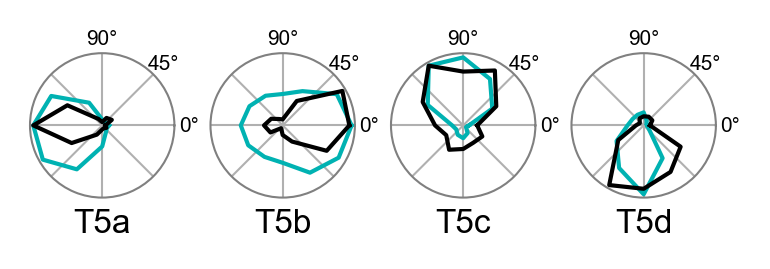

In [24]:
fig, axes, _ = plots.plt_utils.get_axis_grid(
    range(4),
    projection="polar",
    aspect_ratio=4,
    figsize=[2.95, 0.83],
    wspace=0.25,
)
for i, cell_type in enumerate(["T5a", "T5b", "T5c", "T5d"]):
#     weights = (
#         1
#         - task_error.values[relevant_clusters[cell_type][0]]
#         / task_error.values[relevant_clusters[cell_type][0]].max()
#     )
    peak.plot_angular_tuning(
        cell_type,
        intensity=0,
        fig=fig,
        ax=axes[i],
        groundtruth=True,
        linewidth=1.0,
        tuning=peak[:, relevant_clusters[cell_type][0]],
#         weighted_average=weights,
    )
    axes[i].set_xlabel(cell_type)

for ax in axes:
    ax.xaxis.label.set_fontsize(8)
    [i.set_linewidth(0.5) for i in ax.spines.values()]
    ax.grid(True, linewidth=0.5)

# fig.savefig(directory/"T5_tuning_off_w_groundtruth_mean.pdf", bbox_inches="tight", transparent=True)

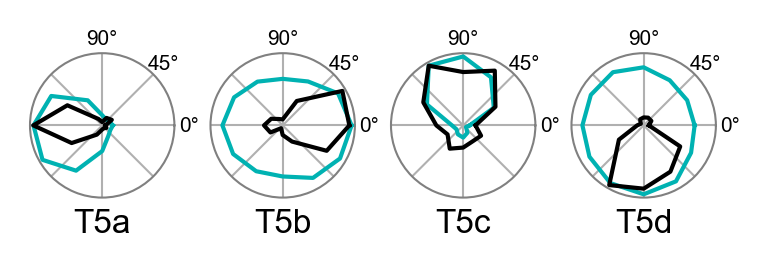

In [1111]:
fig, axes, _ = plots.plt_utils.get_axis_grid(
    range(4),
    projection="polar",
    aspect_ratio=4,
    figsize=[2.95, 0.83],
    wspace=0.25,
)
for i, cell_type in enumerate(["T5a", "T5b", "T5c", "T5d"]):
#     weights = (
#         1
#         - task_error.values[relevant_clusters[cell_type][0]]
#         / task_error.values[relevant_clusters[cell_type][0]].max()
#     )
    response_view.plot_angular_tuning(
        cell_type,
        intensity=0,
        norm=norm,
        fig=fig,
        ax=axes[i],
        groundtruth=True,
        linewidth=1.0,
        tuning=peak[:, relevant_clusters[cell_type][0]],
#         weighted_average=weights,
    )
    axes[i].set_xlabel(cell_type)

for ax in axes:
    ax.xaxis.label.set_fontsize(8)
    [i.set_linewidth(0.5) for i in ax.spines.values()]
    ax.grid(True, linewidth=0.5)

fig.savefig(directory/"T5_tuning_off_w_groundtruth_mean_norm_without_rectification.pdf", bbox_inches="tight", transparent=True)

In [ ]:
fig, axes, _ = plots.plt_utils.get_axis_grid(
    range(4),
    projection="polar",
    aspect_ratio=4,
    figsize=[2.95, 0.83],
    wspace=0.25,
)
for i, cell_type in enumerate(["T5a", "T5b", "T5c", "T5d"]):
    response_view.plot_angular_tuning(
        cell_type,
        intensity=1,
        fig=fig,
        ax=axes[i],
        groundtruth=True,
        linewidth=1.0,
        tuning=peak[:, relevant_clusters[cell_type][0]],
        compare_across_contrasts=True,
    )
    response_view.plot_angular_tuning(
        cell_type,
        intensity=0,
        fig=fig,
        ax=axes[i],
        groundtruth=True,
        linewidth=1.0,
        tuning=peak[:, relevant_clusters[cell_type][0]],
        compare_across_contrasts=True,
    )    
    axes[i].set_xlabel(cell_type)
    
for ax in axes:
    ax.xaxis.label.set_fontsize(8)
    [i.set_linewidth(0.5) for i in ax.spines.values()]
    ax.grid(True, linewidth=0.5)
    
fig.savefig(directory/"T5_tuning_on_off_w_groundtruth_mean.pdf", bbox_inches="tight", transparent=True)

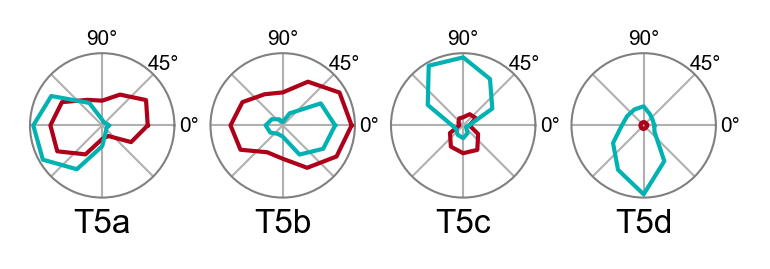

In [29]:
fig, axes, _ = plots.plt_utils.get_axis_grid(
    range(4),
    projection="polar",
    aspect_ratio=4,
    figsize=[2.95, 0.83],
    wspace=0.25,
)
for i, cell_type in enumerate(["T5a", "T5b", "T5c", "T5d"]):
    peak.plot_angular_tuning(
        cell_type,
        intensity=1,
        fig=fig,
        ax=axes[i],
        groundtruth=False,
        linewidth=1.0,
        tuning=peak[:, relevant_clusters[cell_type][0]],
        compare_across_contrasts=True,
    )
    peak.plot_angular_tuning(
        cell_type,
        intensity=0,
        fig=fig,
        ax=axes[i],
        groundtruth=False,
        linewidth=1.0,
        tuning=peak[:, relevant_clusters[cell_type][0]],
        compare_across_contrasts=True,
    )    
    axes[i].set_xlabel(cell_type)
    
for ax in axes:
    ax.xaxis.label.set_fontsize(8)
    [i.set_linewidth(0.5) for i in ax.spines.values()]
    ax.grid(True, linewidth=0.5)
    
fig.savefig(directory/"T5_tuning_on_off_w_groundtruth_mean.pdf", bbox_inches="tight", transparent=True)

# b - average responses to edges moving in preferred and null direction

In [20]:
from dvs.analysis.response_views.moving_edge_currrents import MovingEdgeCurrentView, CellTypeArray

In [17]:
cell_type = "T4c"
moving_edge_currents_subwrap = "review_currents/moving_edge"

In [43]:
current_views = {}

In [56]:
norm = CellTypeArray(ensemble.responses_to_naturalistic_stimulus_norm(naturalistic_responses_wrap,
                                                                      rectified=False), 
                     ensemble.ctome.unique_node_types[:].astype(str))

In [57]:
for cell_type in ["T4a", "T4b", "T4c", "T4d", "T5a", "T5b", "T5c", "T5d", "TmY3"]:
    if cell_type not in current_views:
        current_views[cell_type] = MovingEdgeCurrentView(ensemble, cell_type, moving_edge_currents_subwrap)
    view = current_views[cell_type]
    current_views[cell_type] = view.divide_by_given_norm(norm)

In [63]:
hide_source_types="auto"
hide_source_types_bins=7
hide_source_types_cut_off_edge=1
hide_source_types_mode="below_cut_off"

In [64]:
inputs = dvs.namespacify({cell_type: dict(majors = {}, minors = {}) for cell_type in ["T4a", "T4b", "T4c", "T4d", "T5a", "T5b", "T5c", "T5d", "TmY3"]})

for cell_type in ["T4a", "T4b", "T4c", "T4d", "T5a", "T5b", "T5c", "T5d", "TmY3"]:
    if cell_type not in current_views:
        current_views[cell_type] = MovingEdgeCurrentView(ensemble, cell_type, moving_edge_currents_subwrap)
    view = current_views[cell_type]
    
    inputs[cell_type].majors = view.model_selection(
                relevant_clusters[cell_type][0]
            ).filter_source_types(
                            hide_source_types,
                            hide_source_types_bins,
                            hide_source_types_cut_off_edge,
                            "below_cut_off",
                        )
    inputs[cell_type].minors = view.model_selection(
                relevant_clusters[cell_type][0]
            ).filter_source_types(
                            hide_source_types,
                            hide_source_types_bins,
                            hide_source_types_cut_off_edge,
                            "above_cut_off",
                        )

In [65]:
inputs

Namespace(
  T4a = Namespace(
    majors = array(['Mi1', 'Tm3', 'T4a', 'Mi9', 'TmY15', 'CT1M10', 'Mi4'], dtype='<U6'),
    minors = array(['T4d', 'T5a', 'C2', 'Mi10', 'C3'], dtype='<U4')
  ),
  T4b = Namespace(
    majors = array(['Mi1', 'T4b', 'Tm3', 'Mi9', 'CT1M10', 'TmY15', 'Mi4'], dtype='<U6'),
    minors = array(['T5b', 'C3', 'Mi10'], dtype='<U4')
  ),
  T4c = Namespace(
    majors = array(['Mi1', 'Tm3', 'T4c', 'Mi9', 'TmY15', 'CT1M10', 'Mi4'], dtype='<U6'),
    minors = array(['T5c', 'T4a', 'T4b', 'Mi10', 'C3'], dtype='<U4')
  ),
  T4d = Namespace(
    majors = array(['Mi1', 'Tm3', 'T4d', 'C3', 'Mi9', 'TmY15', 'CT1M10', 'Mi4'],
      dtype='<U6'),
    minors = array(['T5d', 'Mi10'], dtype='<U4')
  ),
  T5a = Namespace(
    majors = array(['T4a', 'Tm1', 'Tm4', 'CT1Lo1', 'TmY15'], dtype='<U6'),
    minors = array(['Tm9', 'T5a', 'Tm2'], dtype='<U3')
  ),
  T5b = Namespace(
    majors = array(['Tm1', 'Tm9', 'T5b', 'T4b', 'Tm4', 'TmY15', 'CT1Lo1'], dtype='<U6'),
    minors = array(['T

In [68]:
cell_type = "T4c"

In [69]:
currents = MovingEdgeCurrentView(ensemble, cell_type, moving_edge_currents_subwrap)

In [70]:
norm = CellTypeArray(ensemble.responses_to_naturalistic_stimulus_norm(naturalistic_responses_wrap,
                                                                      rectified=False), 
                     ensemble.ctome.unique_node_types[:].astype(str))

In [71]:
currents = currents.divide_by_given_norm(norm)

##### model average

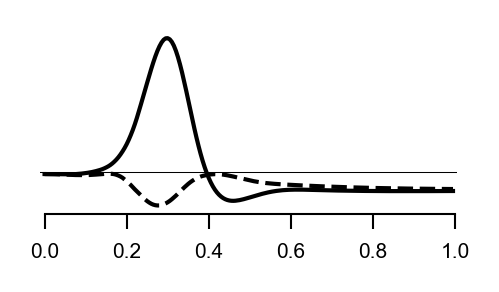

In [76]:
fig, ax = currents.model_selection(relevant_clusters[cell_type][0]).plot_response(
    1, 90, t_end=1.0
)
xlim_responses = ax.get_xlim()
fig.savefig(directory/"T4c_PD_ND_responses_w_time.pdf", bbox_inches="tight", transparent=True)

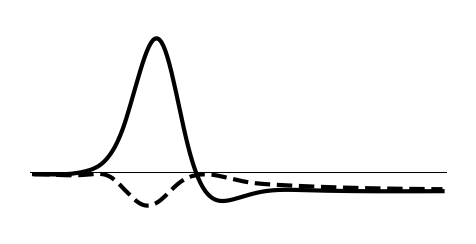

In [77]:
fig, ax = currents.model_selection(relevant_clusters[cell_type][0]).plot_response(
    1, 90, t_end=1.0
)
dvs.plots.rm_spines(ax)
xlim_responses = ax.get_xlim()
fig.savefig(directory/"T4c_PD_ND_responses_wo_time.pdf", bbox_inches="tight", transparent=True)

##### CI 0.25 0.75

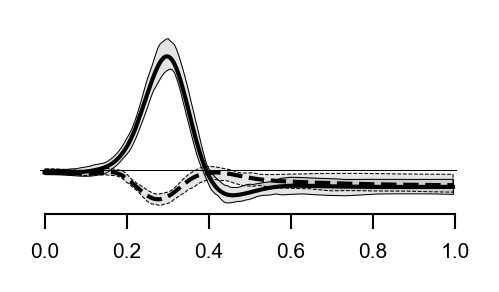

In [367]:
fig, ax = currents.model_selection(relevant_clusters[cell_type][0]).plot_response(
    1, 90, t_end=1.0, quantile=[0.25, 0.75]
)
fig.savefig(directory/"T4c_PD_ND_responses_IQR.pdf", bbox_inches="tight", transparent=True)

##### average currents

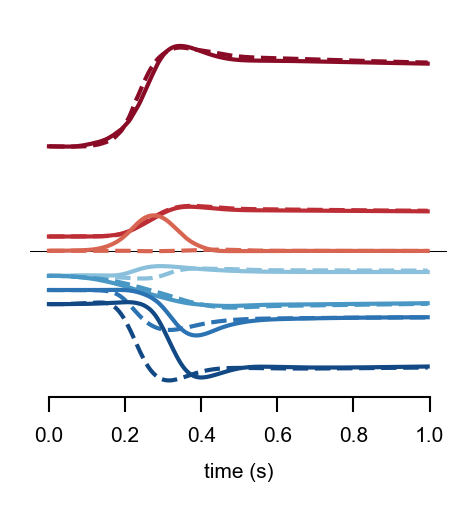

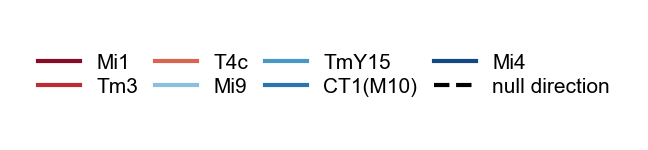

In [74]:
fig, ax, legend_fig, legend_ax = currents.model_selection(
    relevant_clusters[cell_type][0]
).plot_temporal_contributions(
    1,
    90,
    t_start=0,
    t_end=1,
    model_average=True,
    legend=False,
    sum_exc_inh=False,
    only_sum=False,
    max_figure_height_cm=3.3941,
    panel_height_cm=3.3941,
    max_figure_width_cm=4.0513,
    panel_width_cm=4.0513,
    hide_source_types=["T4a", "T4b", "T5c", "Mi10", "C3"]
)
ylim = ax.get_ylim()
fig.savefig(directory/"T4c_PD_ND_currents_w_time.pdf", bbox_inches="tight", transparent=True)
legend_fig.savefig(directory/"T4c_PD_ND_currents_legend.pdf", bbox_inches="tight", transparent=True)

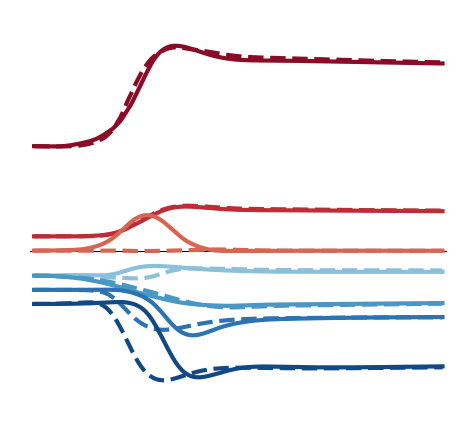

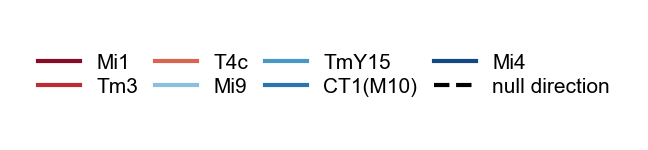

In [79]:
fig, ax, legend_fig, legend_ax = currents.model_selection(
    relevant_clusters[cell_type][0]
).plot_temporal_contributions(
    1,
    90,
    t_start=0,
    t_end=1,
    model_average=True,
    legend=False,
    sum_exc_inh=False,
    only_sum=False,
    max_figure_height_cm=3.3941,
    panel_height_cm=3.3941,
    max_figure_width_cm=4.0513,
    panel_width_cm=4.0513,
    hide_source_types=["T4a", "T4b", "T5c", "Mi10", "C3"]
)
ylim = ax.get_ylim()
dvs.plots.rm_spines(ax)
ax.set_xlabel("")
ax.set_xlim(xlim_responses)
fig.savefig(directory/"T4c_PD_ND_currents_wo_time.pdf", bbox_inches="tight", transparent=True)
legend_fig.savefig(directory/"T4c_PD_ND_currents_legend.pdf", bbox_inches="tight", transparent=True)

##### IQR

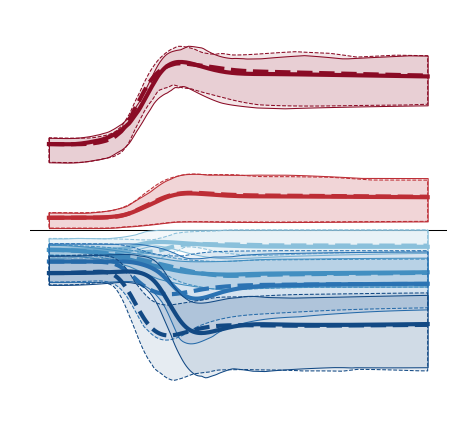

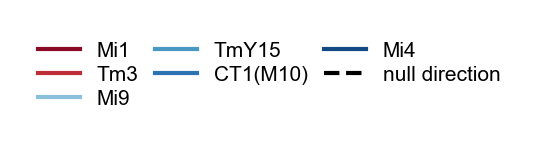

In [370]:
fig, ax, legend_fig, legend_ax = currents.model_selection(
    relevant_clusters[cell_type][0]
).plot_temporal_contributions(
    1,
    90,
    t_start=0,
    t_end=1,
    model_average=True,
    legend=False,
    sum_exc_inh=False,
    only_sum=False,
    max_figure_height_cm=3.3941,
    panel_height_cm=3.3941,
    max_figure_width_cm=4.0513,
    panel_width_cm=4.0513,
    quantile=[0.25, 0.75],
#     hide_source_types=[
#         "C3",
#         "CT1M10",
# #         "Mi1",
#         "Mi4",
# #         "Mi9",
#         "Mi10",
#         "T4a",
#         "T4b",
#         "T4c",
#         "T5c",
# #         "Tm3",
#         "TmY15",
#     ],
)
ylim = ax.get_ylim()
dvs.plots.rm_spines(ax)
ax.set_xlabel("")
fig.savefig(directory/"T4c_PD_ND_currents_wo_time_IQR.pdf", bbox_inches="tight", transparent=True)
# legend_fig.savefig(directory/"T4c_PD_ND_currents_legend.pdf", bbox_inches="tight", transparent=True)

# e - average temporal receptive fields of motion detector input and lamina neurons

In [32]:
from dvs.plots.figsize_utils import fit_panel_size
from dvs.plots.decoration import patch_type_str, flash_response_color_labels, color_labels, color_label
from dvs.analysis.response_views.moving_edge_currrents import adapt_color_alpha
from dvs.plots.decoration import patch_type_texts

In [33]:
validation_subwrap = "original_validation_v2"
validation_loss_fn = "epe"
central_impulses_subwrap = "{}/{}_based/central_impulses_responses_{}_long"
dt = 1/1000
subdir = central_impulses_subwrap.format(validation_subwrap, validation_loss_fn, dt)
stim_config = ensemble[0].tnn[subdir].spec
dataset = dvs.datasets.dots.CentralImpulses(**stim_config)
dataset.dt = stim_config.dt
arg_df = dataset.arg_df
central_impulse_responses = np.array(
    [
        nnv.tnn[subdir].network_states.nodes.activity_central[:]
        for nnv in ensemble.values()
    ]
)

In [34]:
dataset.t_pre

1.0

In [44]:
cir_view.arg_df

,u,v,offset,coordinate_index,intensity,t_impulse
0,0,0,0,[360],0.0,0.005
1,0,0,0,[360],0.0,0.020
2,0,0,0,[360],0.0,0.050
3,0,0,0,[360],0.0,0.100
4,0,0,0,[360],0.0,0.200
5,0,0,0,[360],0.0,0.300
6,0,0,0,[360],1.0,0.005
7,0,0,0,[360],1.0,0.020
8,0,0,0,[360],1.0,0.050
9,0,0,0,[360],1.0,0.100


In [35]:
cir_view = StimulusResponseIndexer(
    arg_df,
    CellTypeArray(central_impulse_responses, ctome=ensemble.ctome),
    dataset.dt,
    dataset.t_pre,
    stim_sample_dim=1,
    temporal_dim=2,
)

In [36]:
rnorm = ensemble.responses_to_naturalistic_stimulus_norm(naturalistic_responses_wrap, rectified=False)

In [37]:
trf_cell_types = np.array(
    [
        "Mi1",
        "Tm3",
        "Mi4",
        "Mi9",
        "CT1M10",
        "Tm1",
        "Tm2",
        "Tm4",
        "Tm9",
        "CT1Lo1",
        "L1",
        "L2",
        "L3",
        "L4",
        "L5",
    ]
).reshape(5, 3, order="F")

In [38]:
cir_view = (cir_view
                .divide_by_given_array(rnorm[:], dims=(0, -1))
                .between_seconds(-cir_view.dt, 1.0)
           )

In [39]:
from dvs.plots import truncate_colormap

In [40]:
durations = [0.02, 0.05, 0.1, 0.2, 0.3]
on_cmap = truncate_colormap(plt.cm.Blues_r, minval=0., maxval=0.4).resampled(len(durations))
off_cmap = truncate_colormap(plt.cm.Blues_r, minval=0.5, maxval=0.9).resampled(len(durations))
cmaps = {
    1.: [on_cmap(i) for i in range(on_cmap.N)][::-1],
    0: [off_cmap(i) for i in range(off_cmap.N)][::-1]
}

/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:176: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(new)
/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:183: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(new)


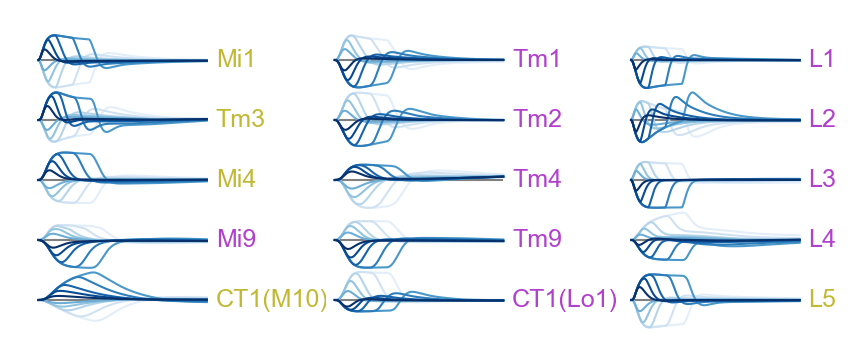

In [43]:
fig, axes = fit_panel_size(
    5,
    3,
    max_figure_height_cm=5.35,
    max_figure_width_cm=8,
    panel_width_cm=8 / 3,
    panel_height_cm=5.35 / 10,
).axis_grid(wspace=0.6, hspace=0.0, as_matrix=True)
for i, row in enumerate(trf_cell_types):
    for j, cell_type in enumerate(row):
        ax = axes[i, j]
        for q, duration in enumerate(durations[::-1]):
            for intensity in [0, 1]:
                color = cmaps[intensity][q] #plt.cm.Blues(256) if intensity == 1 else plt.cm.Blues(128)
#                 linestyle = "solid" if intensity == 1 else "dashed"
                zorder = 1 if intensity == 1 else 0
                r = (
                    cir_view.where_stim_args(t_impulse=duration, intensity=intensity)
                    .cell_type(cell_type)[relevant_clusters[cell_type][0]]
                )
                trf = r[:].squeeze().T
                mean = trf.mean(axis=1)
                # subtract baseline after model averaging to plot it centered
                mean = mean - mean[[0]]
                #         ci = np.quantile(trf, [0.25, 0.75], axis=1)
                ax.plot(r.time, mean, linewidth=0.5, color=color, zorder=zorder)
        ax.hlines(
            mean[0],
            r.time.min(),
            r.time.max(),
            linewidth=0.5,
            color="0.5",
            zorder=-1,
        )
        #         ax.plot(r.time, ci[0], color=color, linewidth=0.25)
        #         ax.plot(r.time, ci[1], color=color, linewidth=0.25)
        #         ax.fill_between(r.time,
        #                         ci[0],
        #                         ci[1],
        #                         facecolor=adapt_color_alpha(color, 0.1))
        dvs.plots.rm_spines(ax)
        ax.yaxis.set_label_position("right")
        ax.set_ylabel(
            cell_type,
            fontsize=6,
            rotation=0,
            ha="left",
            va="center",
            labelpad=0.1,
        )
        #         ylim = np.array)
        ylim = np.array(ax.get_ylim())
        ylim = (-max(abs(ylim)), max(abs(ylim)))
        ax.set_ylim(ylim)

for ax in axes.flatten():
    flash_response_color_labels(ax)
    patch_type_texts(ax)

fig.savefig(directory / "temporal_rfs_long_impulse_mean.pdf", bbox_inches="tight", transparent=True)

/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:176: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(new)
/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:183: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(new)


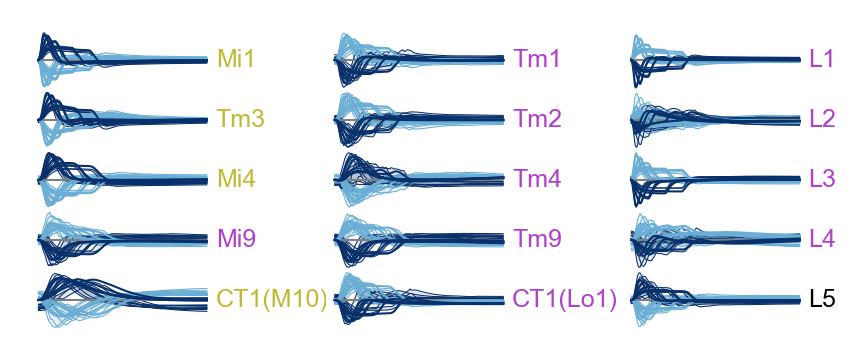

In [48]:
# fig, axes = fit_panel_size(
#     5,
#     3,
#     max_figure_height_cm=5.35,
#     max_figure_width_cm=8,
#     panel_width_cm=8 / 3,
#     panel_height_cm=5.35 / 10,
# ).axis_grid(wspace=0.6, hspace=0.0, as_matrix=True)
# for i, row in enumerate(trf_cell_types):
#     for j, cell_type in enumerate(row):
#         ax = axes[i, j]
#         for duration in [0.02, 0.05, 0.1, 0.2, 0.3]:
#             for intensity in [0, 1]:
#                 color = plt.cm.Blues(256) if intensity == 1 else plt.cm.Blues(128)
# #                 linestyle = "solid" if intensity == 1 else "dashed"
#                 zorder = 1 if intensity == 1 else 0
#                 r = (
#                     cir_view.where_stim_args(t_impulse=duration, intensity=intensity)
#                     .between_seconds(-cir_view.dt, 1.0)
#                     .subtract_baseline()
#                     .standardize()
#                     .cell_type(cell_type)[relevant_clusters[cell_type][0]]
#                 )
#                 trf = r[:].squeeze().T
#                 mean = trf.mean(axis=1)
#                 mean = mean - mean[[0]]
#                 ax.plot(r.time, mean, linewidth=0.5, color=color, zorder=zorder)
#                 ci = np.quantile(trf, [0.25, 0.75], axis=1)
#                 ax.plot(r.time, ci[0], color=color, linewidth=0.25, zorder=-10)
#                 ax.plot(r.time, ci[1], color=color, linewidth=0.25, zorder=-10)
#                 ax.fill_between(r.time,
#                                 ci[0],
#                                 ci[1],
#                                 facecolor=adapt_color_alpha(color, 0.1), zorder=-10)
#         ax.hlines(
#             mean[0],
#             r.time.min(),
#             r.time.max(),
#             linewidth=0.5,
#             color="0.5",
#             zorder=-1,
#         )

#         dvs.plots.rm_spines(ax)
#         ax.yaxis.set_label_position("right")
#         ax.set_ylabel(
#             cell_type,
#             fontsize=6,
#             rotation=0,
#             ha="left",
#             va="center",
#             labelpad=0.1,
#         )
#         #         ylim = np.array)
#         ylim = np.array(ax.get_ylim())
#         ylim = (-max(abs(ylim)), max(abs(ylim)))
#         ax.set_ylim(ylim)

# for ax in axes.flatten():
#     flash_response_color_labels(ax)
#     patch_type_texts(ax)

# fig.savefig(directory / "temporal_rfs_long_impulse_IQR.pdf", bbox_inches="tight", transparent=True)

## stimulus

In [867]:
# relevant time window
t_start = -dataset.dt
t_end = 1.0
time = (
    np.arange(
        0,
        ensemble[0]
        .tnn[subdir]
        .network_states.nodes.activity_central.shape[1],
        1,
    )
    * dataset.dt
    - dataset.t_pre
)
temporal_index = np.arange(len(time))[(time >= t_start) & (time <= t_end)]
start_index = temporal_index.min()
stop_index = temporal_index.max()

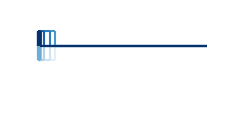

In [869]:
fig, axes = fit_panel_size(
    5,
    3,
    max_figure_height_cm=5.35,
    max_figure_width_cm=8,
    panel_width_cm=8 / 3,
    panel_height_cm=5.35 / 10,
).axis_grid(wspace=0.6, hspace=0.0, as_matrix=True, unmask_n=1)
ax = axes[0, 0]
# fig, ax = plt.subplots(figsize=[4, 4])
eps = 0.005
for j, duration in enumerate(durations[::-1]):
    for intensity in [0, 1]:
        color = cmaps[intensity][j]
        #                 linestyle = "solid" if intensity == 1 else "dashed"
        zorder = 1 if intensity == 1 else 0

        index = cir_view.where_stim_args_index_static(
            dataset.arg_df, intensity=intensity, t_impulse=duration, u=0, v=0
        )
        stim = dataset[index][0][start_index - 1 : stop_index, 721 // 2].cpu()
        indices = torch.nonzero(torch.diff(stim))[:, 0]
        for i, index in enumerate(indices):
            ax.vlines(
                time[index],
                stim[index]+ (eps if intensity == 1 else -eps),
                stim[index + 1]+ (eps if intensity == 1 else -eps),
                linewidth=0.5,
                color=color,
                zorder=zorder,
            )
            try:
                ax.hlines(
                    stim[index + 1] + (eps if intensity == 1 else -eps),
                    time[index],
                    time[indices[i + 1]],
                    linewidth=0.5,
                    color=color,
                    zorder=zorder,
                )
            except IndexError:
                ax.hlines(
                    stim[index + 1] + (eps if intensity == 1 else -eps),
                    time[index],
                    time[-1],
                    linewidth=0.5,
                    color=color,
                    zorder=zorder,
                )
# ax.hlines(
#     0,
#     time.min(),
#     time.max(),
#     linewidth=0.5,
#     color="0.5",
#     zorder=-1,
# )
#         ax.plot(r.time, ci[0], color=color, linewidth=0.25)
#         ax.plot(r.time, ci[1], color=color, linewidth=0.25)
#         ax.fill_between(r.time,
#                         ci[0],
#                         ci[1],
#                         facecolor=adapt_color_alpha(color, 0.1))
dvs.plots.rm_spines(ax)
# ax.yaxis.set_label_position("right")

#         ylim = np.array)
ylim = np.array(ax.get_ylim())
ylim = (-max(abs(ylim)), max(abs(ylim)))
ax.set_ylim(ylim)


fig.savefig(
    directory / "trf_stimulus_schematic_with_vlines.pdf",
    bbox_inches="tight",
    transparent=True,
)

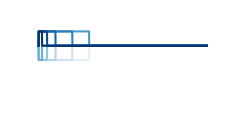

In [870]:
fig, axes = fit_panel_size(
    5,
    3,
    max_figure_height_cm=5.35,
    max_figure_width_cm=8,
    panel_width_cm=8 / 3,
    panel_height_cm=5.35 / 10,
).axis_grid(wspace=0.6, hspace=0.0, as_matrix=True, unmask_n=1)
ax = axes[0, 0]
for j, duration in enumerate(durations[::-1]):
    for intensity in [0, 1]:
        color = cmaps[intensity][j]
        #                 linestyle = "solid" if intensity == 1 else "dashed"
        zorder = 1 if intensity == 1 else 0
        index = cir_view.where_stim_args_index_static(
            dataset.arg_df, intensity=intensity, t_impulse=duration, u=0, v=0
        )
        stim = dataset[index][0][start_index-1:stop_index, 721//2].cpu()
        ax.plot(stim, linewidth=0.5, color=color, zorder=zorder)
ax.hlines(
    0,
    time.min(),
    time.max(),
    linewidth=0.5,
    color="0.5",
    zorder=-1,
)
#         ax.plot(r.time, ci[0], color=color, linewidth=0.25)
#         ax.plot(r.time, ci[1], color=color, linewidth=0.25)
#         ax.fill_between(r.time,
#                         ci[0],
#                         ci[1],
#                         facecolor=adapt_color_alpha(color, 0.1))
dvs.plots.rm_spines(ax)
# ax.yaxis.set_label_position("right")

#         ylim = np.array)
ylim = np.array(ax.get_ylim())
ylim = (-max(abs(ylim)), max(abs(ylim)))
ax.set_ylim(ylim)


fig.savefig(
    directory / "trf_stimulus_schematic.pdf",
    bbox_inches="tight",
    transparent=True,
)

# average spatio-temporal receptive fields

In [930]:
from dvs.datasets.dots import SpatialImpulses
from dvs.utils.activity_utils import StimulusResponseIndexer
from dvs.plots import plt_utils
from dvs import utils, Namespace
def plot_strf(
    time,
    rf,
    hlines=True,
    vlines=True,
    time_axis=True,
    fontsize=6,
    fig=None,
    axes=None,
    figsize=[5, 1],
    wspace=-0.15,
    y_offset_time_axis=0,
):
    n_frames = rf.shape[0]
    max_extent = dvs.utils.get_hextent(rf.shape[-1])
    t_steps = np.arange(0.0, 0.2, 0.01)[::2]

    u, v = utils.get_hex_coords(max_extent)
    x, y = utils.hex_to_pixel(u, v)
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()
    elev = 0
    azim = 0

    #     x, y = hex_rows(1, 10)
    if fig is None or axes is None:
        fig, axes = plt_utils.divide_figure_to_grid(
            np.arange(10).reshape(1, 10),
            wspace=wspace,
            as_matrix=True,
            figsize=figsize,
        )

    crange = np.abs(rf).max()
#     crange = np.quantile(np.abs(rf), 0.99)

    for i, t in enumerate(t_steps):
        mask = np.where(np.abs(time - t) <= 1e-15, True, False)
        _rf = rf[mask]
        plots.quick_hex_scatter(
            _rf,
            cmap=plt.cm.coolwarm,
            edgecolor=None,
            vmin=-crange,
            vmax=crange,
            midpoint=0,
            cbar=False,
            max_extent=max_extent,
            fig=fig,
            ax=axes[0, i],
            fill=True,
            fontsize=fontsize,
        )

        if hlines:
            axes[0, i].hlines(
                elev, xmin, xmax, color="grey", linewidth=0.25
            )
        if vlines:
            axes[0, i].vlines(
                azim, ymin, ymax, color="grey", linewidth=0.25
            )

    if time_axis:
        left = fig.transFigure.inverted().transform(
            axes[0, 0].transData.transform((0, 0))
        )[0]
        right = fig.transFigure.inverted().transform(
            axes[0, -1].transData.transform((0, 0))
        )[0]

        lefts, bottoms, rights, tops = np.array(
            [ax.get_position().extents for ax in axes.flatten()]
        ).T
        #         time_axis = fig.add_axes((lefts.min(), bottoms.min(), rights.max() - lefts.min(), 0.01))
        time_axis = fig.add_axes(
            (
                left,
                bottoms.min() + y_offset_time_axis * bottoms.min(),
                right - left,
                0.01,
            )
        )
        dvs.plots.rm_spines(
            time_axis,
            ("left", "top", "right"),
            rm_yticks=True,
            rm_xticks=False,
        )

        data_centers_in_points = np.array(
            [ax.transData.transform((0, 0)) for ax in axes.flatten()]
        )
        time_axis.tick_params(axis="both", labelsize=fontsize)
        ticks = time_axis.transData.inverted().transform(
            data_centers_in_points
        )[:, 0]
        time_axis.set_xticks(ticks)
        time_axis.set_xticklabels(np.arange(0, 200, 20))
        time_axis.set_xlabel("time (ms)", fontsize=fontsize, labelpad=2)
        plt_utils.set_spine_tick_params(
            time_axis,
            spinewidth=0.25,
            tickwidth=0.25,
            ticklength=3,
            ticklabelpad=2,
            spines=("top", "right", "bottom", "left"),
        )
    #         time_axis.set_xlim(*dvs.plots.get_lims(ticks, 0))

    #     axes[0].set_ylabel(node_type, fontsize=FONTSIZE, labelpad=-8)
    #     plt.subplots_adjust(wspace=-0.1)
    return fig, axes


def plot_strf_quantiles(
    time,
    rf,
    quantiles,
    hlines=True,
    vlines=True,
    time_axis=True,
    fontsize=6,
    fig=None,
    axes=None,
    figsize=[5, 1],
    wspace=-0.15,
    y_offset_time_axis=0,
):
    n_frames = rf.shape[0]
    max_extent = dvs.utils.get_hextent(rf.shape[-1])
    t_steps = np.arange(0.0, 0.2, 0.01)[::2]

    u, v = utils.get_hex_coords(max_extent)
    x, y = utils.hex_to_pixel(u, v)
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()
    elev = 0
    azim = 0

    #     x, y = hex_rows(1, 10)
    if fig is None or axes is None:
        fig, axes = plt_utils.divide_figure_to_grid(
            np.arange(10).reshape(1, 10),
            wspace=wspace,
            as_matrix=True,
            figsize=figsize,
        )

    crange = np.abs(rf).max()
    sm, norm = dvs.plots.get_scalarmapper(
        cmap=plt.cm.coolwarm,
        vmin=-crange,
        vmax=crange,
    )

    for i, t in enumerate(t_steps):
        ax=axes[0, i]
        mask = np.where(np.abs(time - t) <= 1e-15, True, False)
        _rf = rf[mask].squeeze()
        _q = quantiles[mask].squeeze()
#         import pdb; pdb.set_trace()
        ax.scatter(
            np.arange(len(_rf)),
            _rf[::-1],
            color=sm.to_rgba(_rf[::-1]),
            zorder=10,
            s=2,
            marker="h"
        )
        #         ax.plot(quantile_srfs[cell_type][1], color="C0", lw=0.25, marker='o', ms=1, ls='None')
        #         ax.plot(quantile_srfs[cell_type][0], color="C0", lw=0.25, marker='o', ms=1, ls='None')
        ax.fill_between(
            np.arange(len(_rf)),
            _q[:, 0][::-1],
            _q[:, 1][::-1],
            color=adapt_color_alpha("C0", 0.2),
            zorder=-10
        )    

    ylims = dvs.plots.get_lims(quantiles, 0.1)
    for ax in axes.flatten():
        ax.set_ylim(ylims)
        dvs.plots.rm_spines(ax)
        
    if time_axis:
        left = fig.transFigure.inverted().transform(
            axes[0, 0].transData.transform((len(u)//2, 0))
        )[0]
        right = fig.transFigure.inverted().transform(
            axes[0, -1].transData.transform((len(u)//2, 0))
        )[0]

        lefts, bottoms, rights, tops = np.array(
            [ax.get_position().extents for ax in axes.flatten()]
        ).T
        #         time_axis = fig.add_axes((lefts.min(), bottoms.min(), rights.max() - lefts.min(), 0.01))
        time_axis = fig.add_axes(
            (
                left,
                bottoms.min() + y_offset_time_axis * bottoms.min(),
                right - left,
                0.01,
            )
        )
        dvs.plots.rm_spines(
            time_axis,
            ("left", "top", "right"),
            rm_yticks=True,
            rm_xticks=False,
        )

        data_centers_in_points = np.array(
            [ax.transData.transform((len(u)//2, 0)) for ax in axes.flatten()]
        )
        time_axis.tick_params(axis="both", labelsize=fontsize)
        ticks = time_axis.transData.inverted().transform(
            data_centers_in_points
        )[:, 0]
        time_axis.set_xticks(ticks)
        time_axis.set_xticklabels(np.arange(0, 200, 20))
        time_axis.set_xlabel("time (ms)", fontsize=fontsize, labelpad=2)
        plt_utils.set_spine_tick_params(
            time_axis,
            spinewidth=0.25,
            tickwidth=0.25,
            ticklength=3,
            ticklabelpad=2,
            spines=("top", "right", "bottom", "left"),
        )
    #         time_axis.set_xlim(*dvs.plots.get_lims(ticks, 0))

    #     axes[0].set_ylabel(node_type, fontsize=FONTSIZE, labelpad=-8)
    #     plt.subplots_adjust(wspace=-0.1)
    return fig, axes

In [931]:
dt = 1/1000
impulse_responses_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/spatial_impulses_responses_{dt}_long"

In [932]:
config = Namespace(
    impulse_durations=[0.005, 0.02],
    max_extent=4,
    dot_column_radius=0,
    bg_intensity=0.5,
    t_stim=2,
    dt=dt,
    n_ommatidia=721,
    t_pre=1.0,
    t_post=0,
    intensity=1.0,
    mode="impulse",
    device="cuda",
    subwrap=impulse_responses_subwrap,
)
dataset = SpatialImpulses(**config)

In [933]:
arg_df = dataset.arg_df
arg_df["uv"] = list([list(v) for v in zip(arg_df.u, arg_df.v)])
cell_types = ensemble.ctome.unique_node_types[:].astype(str)
strf_view = StimulusResponseIndexer(arg_df, 
                                    CellTypeArray(None, cell_types), 
                                    dataset.dt, 
                                    0,
                                    stim_sample_dim=1,
                                    temporal_dim=2)

In [934]:
# relevant stimuli arguments
intensity = 1
stim_arg_index = StimulusResponseIndexer.where_stim_args_index_static(dataset.arg_df, intensity=intensity).to_numpy()

In [935]:
# relevant time window
t_start = 0
t_end = 0.250
time = (
    np.arange(
        0,
        ensemble[0]
        .tnn[impulse_responses_subwrap]
        .network_states.nodes.activity_central.shape[1],
        1,
    )
    * dataset.dt
    - dataset.t_pre
)
temporal_index = np.arange(len(time))[(time >= t_start) & (time <= t_end)]
start_index = temporal_index.min()
stop_index = temporal_index.max()

In [777]:
strf_responses = np.array(
    [
        nnv.tnn[impulse_responses_subwrap].network_states.nodes.activity_central[
            stim_arg_index, start_index:stop_index
        ]
        for nnv in ensemble.values()
    ]
)

In [936]:
arg_df = dataset.arg_df.iloc[stim_arg_index]
arg_df.reset_index(drop=True, inplace=True)

In [937]:
# update ir view
strf_view = StimulusResponseIndexer(arg_df, 
                                    CellTypeArray(strf_responses, cell_types), 
                                    dataset.dt, 
                                    0,
                                    stim_sample_dim=1,
                                    temporal_dim=2,
                                    time=time[start_index:stop_index])
strf_view = strf_view.divide_by_given_array(rnorm[:], dims=(0, -1))

In [1017]:
strfs = strf_view.where_stim_args(t_impulse=0.02)["Tm9"][relevant_clusters["CT1Lo1"][0]]

In [1018]:
x = strfs[:].mean(axis=0).squeeze().T

#subtracting the spatio-temporal baseline after averaging
x -= x[0].mean(axis=0)

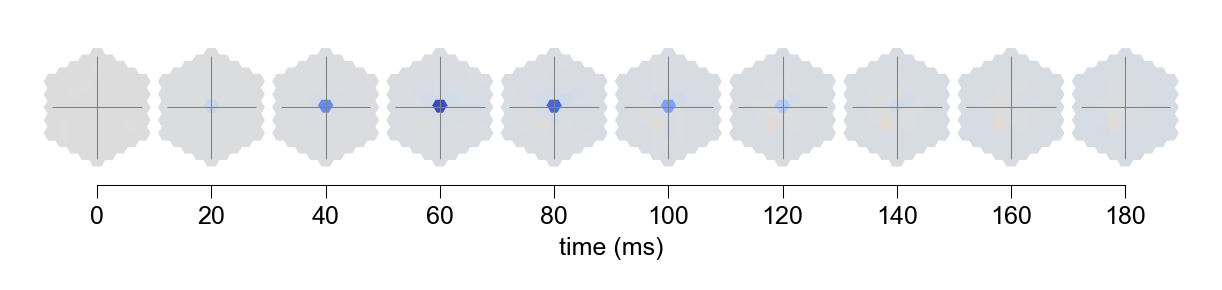

In [1019]:
fig, axes = plot_strf(strfs.time, x)
# fig.savefig(directory/"T4c_strf_best_cluster_average.pdf", bbox_inches="tight", transparent=True)

## T4c

In [938]:
strfs = strf_view.where_stim_args(t_impulse=0.02)["T4c"][relevant_clusters["T4c"][0]]

In [982]:
x = strfs[:].mean(axis=0).squeeze().T

#subtracting the spatio-temporal baseline after averaging
x -= x[0].mean(axis=0)

In [983]:
x.shape

(250, 61)

In [951]:
quantile = np.quantile(
    strfs[:].squeeze(),
    q=[0.25, 0.75],
    axis=0,
).T

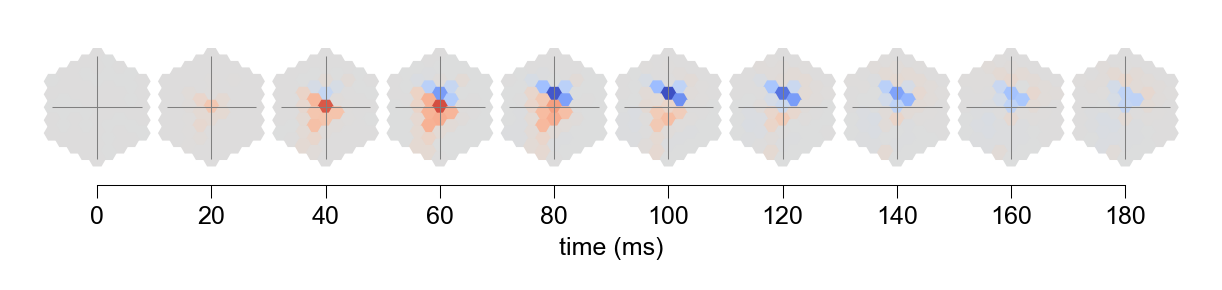

In [949]:
fig, axes = plot_strf(strfs.time, x)
fig.savefig(directory/"T4c_strf_best_cluster_average.pdf", bbox_inches="tight", transparent=True)

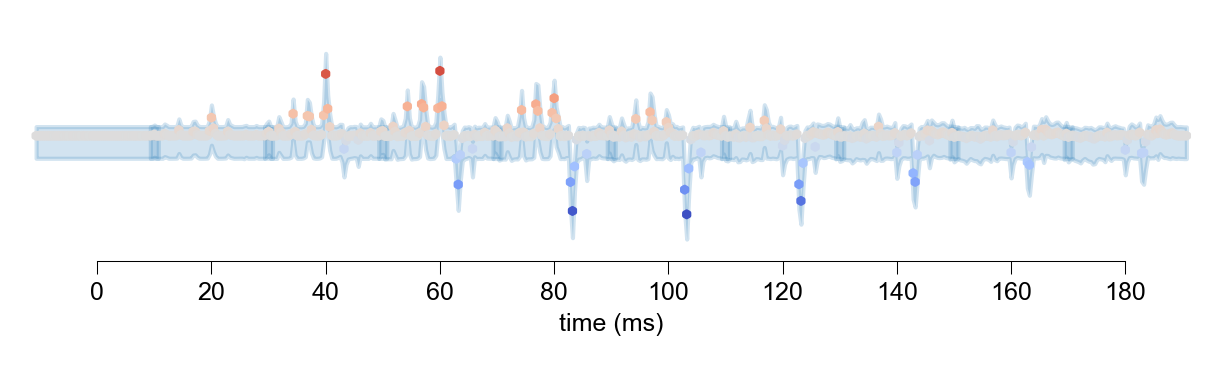

In [952]:
fig, axes = plot_strf_quantiles(strfs.time, x, quantile)
fig.savefig(directory/"T4c_strf_best_cluster_IQR.pdf", bbox_inches="tight", transparent=True)

## T5c

In [953]:
strfs = strf_view.where_stim_args(t_impulse=0.02)["T5c"][relevant_clusters["T5c"][0]]

In [954]:
x = strfs[:].mean(axis=0).squeeze().T

#subtracting the spatio-temporal baseline after averaging
x -= x[0].mean(axis=0)

In [956]:
quantile = np.quantile(
    strfs[:].squeeze(),
    q=[0.25, 0.75],
    axis=0,
).T

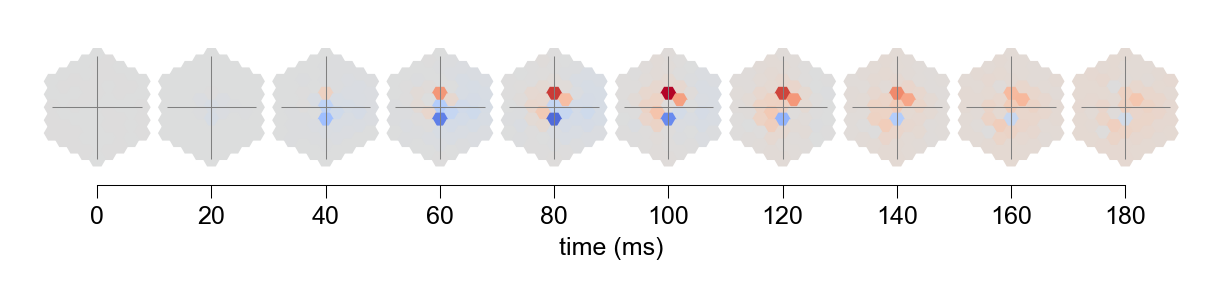

In [957]:
fig, axes = plot_strf(strfs.time, x)
fig.savefig(directory/"T5c_strf_best_cluster_average.pdf", bbox_inches="tight", transparent=True)

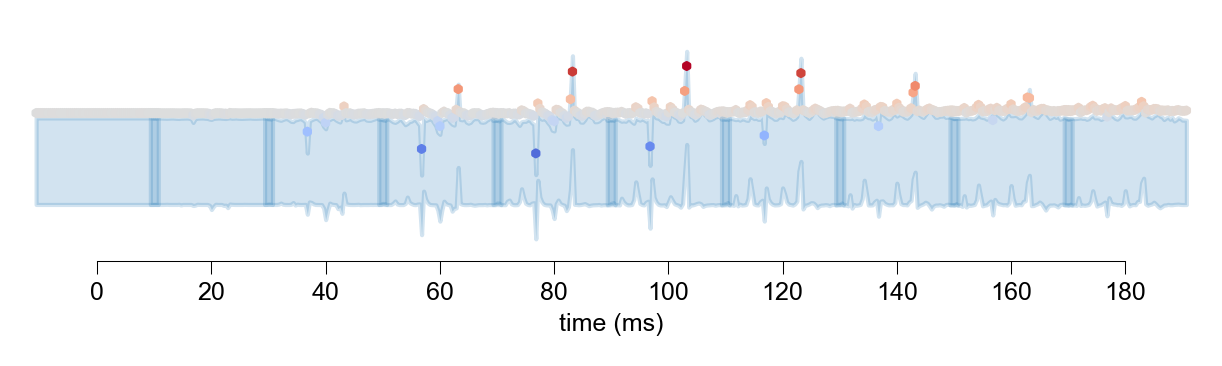

In [958]:
fig, axes = plot_strf_quantiles(strfs.time, x, quantile)
fig.savefig(directory/"T5c_strf_best_cluster_IQR.pdf", bbox_inches="tight", transparent=True)

## spatial receptive fields of inputs

In [ ]:
from dvs.plots.figsize_utils import fit_panel_size
from dvs.plots.decoration import patch_type_str, flash_response_color_labels, color_labels, color_label
from dvs.analysis.response_views.moving_edge_currrents import adapt_color_alpha
from dvs.plots.decoration import patch_type_texts
from scipy.signal import find_peaks

In [1020]:
srf_cell_types = [
#     "L1", "L2", "L3", "L4", "L5",
    "Mi1", "Tm3", "Mi4", "Mi9", "CT1M10",
#     "T4a", "T4b", "T4c", "T4d",        
#     "T5a", "T5b", "T5c", "T5d", 
    "Tm1", "Tm2", "Tm4", "Tm9", "CT1Lo1"
             ]

In [1061]:
def strf_to_srf(x):
    extr_index = find_peaks(np.abs(x[:, x.shape[1]//2]))[0]
    if extr_index.any():
        extr_index = extr_index[0]
    else:
        extr_index = 0
    return x[extr_index].squeeze()

In [1062]:
mean_srfs = {}
for cell_type in srf_cell_types:
    strfs = strf_view.where_stim_args(t_impulse=0.02)[cell_type][relevant_clusters[cell_type][0]]
    x = strfs[:].mean(axis=0).squeeze().T

    # subtracting the spatial average at timepoint 0 after averaging to center
    x -= x[0].mean(axis=0)
    mean_srfs[cell_type] = strf_to_srf(x)

In [1057]:
cell_type = "Mi9"
strfs = strf_view.where_stim_args(t_impulse=0.02)[cell_type][relevant_clusters[cell_type][0]]
x = strfs[:].mean(axis=0).squeeze().T

# subtracting the spatial average at timepoint 0 after averaging to center
x -= x[0].mean(axis=0)

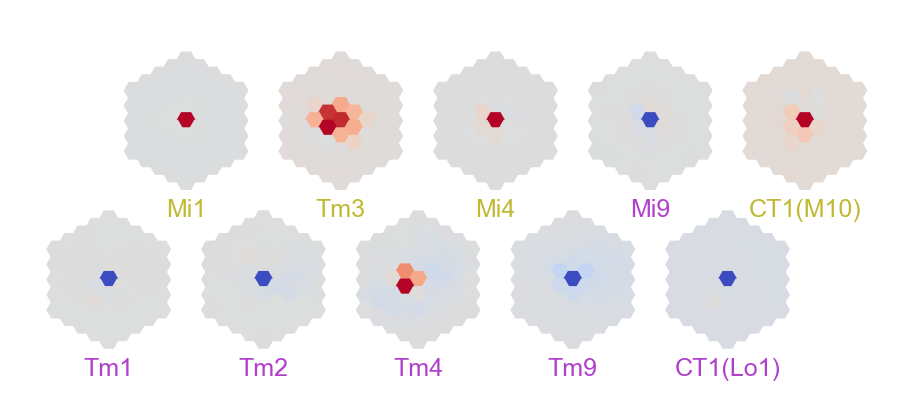

In [1064]:
from dvs.utils.hex_utils import hex_rows

x, y = hex_rows(2, 5)
fig, axes, pos = dvs.plots.plt_utils.regular_ax_scatter(
    x, y, figsize=[3.5, 2], hpad=0, wpad=0.1, wspace=-0.5, hspace=-0.4
)

axes = np.array(axes).reshape(2, 5)

# crange = np.quantile(np.array([v for v in mean_srfs.values()]), 0.99)

for i, row in enumerate(np.array(srf_cell_types).reshape(2, 5)):
    for j, cell_type in enumerate(row):
        crange = np.max(np.abs(mean_srfs[cell_type]))
        fig, ax, _ = dvs.plots.hex_scatter(
            u,
            v,
            mean_srfs[cell_type],
            cmap=plt.cm.coolwarm,
            vmin=-crange,
            vmax=crange,
            figsize=[3, 3],
            cbar=False,
            fig=fig,
            ax=axes[1 - i, j],
        )
        ax.set_xlabel(cell_type, fontsize=6, labelpad=-10)

for ax in axes.flatten():
    flash_response_color_labels(ax)
    patch_type_texts(ax)

fig.savefig(directory / "emd_inputs_average_spatial_rfs_20ms.pdf", bbox_inches="tight", transparent=True)
